In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import dotenv
import warnings
import session_info
import os

In [2]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
# plt.rcParams['figure.figsize'] = (11, 5)

warnings.filterwarnings('ignore')
dotenv.load_dotenv()

True

In [3]:
apartamentos = pd.read_csv('../data/raw/metrocuadrado/venta_apartamentos_bogota.csv')
apartamentos.shape

(11947, 49)

In [4]:
apartamentos .duplicated(subset=['codigo']).sum()

110

In [5]:
apartamentos = apartamentos.drop_duplicates(subset=['codigo'])
apartamentos.shape

(11837, 49)

In [6]:
apartamentos.columns

Index(['precio', 'habitaciones', 'baños', 'estrato', 'codigo', 'barrio',
       'sector', 'antiguedad', 'area_m2', 'administracion', 'parqueaderos',
       'piso', 'amoblado', 'sauna', 'jacuzzi', 'deposito', 'vista_exterior',
       'closets', 'calefaccion', 'estufa', 'vigilancia', 'numero_ascensores',
       'cerca_parque', 'cerca_transporte', 'cerca_centros_comerciales',
       'cerca_colegios_universidades', 'cerca_supermercados',
       'zona_residencial', 'sobre_via_secundaria', 'sobre_via_principal',
       'zc_zonas_verdes', 'zc_salon_comunal', 'zc_gimnasio', 'zc_zonas_bbq',
       'zc_zonas_infantiles', 'zc_cancha_squash', 'acceso_discapacitados',
       'vista_panoramica', 'terraza_balcon', 'area_terraza_balcon', 'terraza',
       'parqueadero_visitantes', 'latitud', 'longitud', 'descripcion',
       'datetime', 'url', 'fuente', 'query'],
      dtype='object')

In [7]:
apartamentos = apartamentos.drop(columns=['url', 'fuente', 'query', 'barrio', 'datetime', 'sector'])
apartamentos.shape

(11837, 43)

In [8]:
apartamentos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11837 entries, 0 to 11946
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   precio                        11836 non-null  float64
 1   habitaciones                  11834 non-null  float64
 2   baños                         11834 non-null  object 
 3   estrato                       11818 non-null  object 
 4   codigo                        11836 non-null  object 
 5   antiguedad                    11829 non-null  object 
 6   area_m2                       11836 non-null  object 
 7   administracion                10623 non-null  float64
 8   parqueaderos                  10618 non-null  float64
 9   piso                          6464 non-null   float64
 10  amoblado                      11837 non-null  int64  
 11  sauna                         11837 non-null  int64  
 12  jacuzzi                       11837 non-null  int64  
 13  deposi

In [9]:
apartamentos['sauna'] = apartamentos['sauna'].astype('category')
apartamentos['jacuzzi'] = apartamentos['jacuzzi'].astype('category')
apartamentos['amoblado'] = apartamentos['amoblado'].astype('category')
apartamentos['parqueadero_visitantes'] = apartamentos['parqueadero_visitantes'].astype('category')
apartamentos['terraza'] = apartamentos['terraza'].astype('category')
apartamentos['vista_exterior'] = apartamentos['vista_exterior'].astype('category')
apartamentos['calefaccion'] = apartamentos['calefaccion'].astype('category')
apartamentos['vigilancia'] = apartamentos['vigilancia'].astype('category')
apartamentos['cerca_parque'] = apartamentos['cerca_parque'].astype('category')
apartamentos['zc_salon_comunal'] = apartamentos['zc_salon_comunal'].astype('category')
apartamentos['zc_gimnasio'] = apartamentos['zc_gimnasio'].astype('category')
apartamentos['zc_zonas_bbq'] = apartamentos['zc_zonas_bbq'].astype('category')
apartamentos['zc_zonas_infantiles'] = apartamentos['zc_zonas_infantiles'].astype('category')
apartamentos['zc_cancha_squash'] = apartamentos['zc_cancha_squash'].astype('category')
apartamentos['acceso_discapacitados'] = apartamentos['acceso_discapacitados'].astype('category')
apartamentos['vista_panoramica'] = apartamentos['vista_panoramica'].astype('category')
apartamentos['cerca_centros_comerciales'] = apartamentos['cerca_centros_comerciales'].astype('category')
apartamentos['cerca_transporte'] = apartamentos['cerca_transporte'].astype('category')
apartamentos['cerca_colegios_universidades'] = apartamentos['cerca_colegios_universidades'].astype('category')
apartamentos['zona_residencial'] = apartamentos['zona_residencial'].astype('category')
apartamentos['sobre_via_secundaria'] = apartamentos['sobre_via_secundaria'].astype('category')
apartamentos['sobre_via_principal'] = apartamentos['sobre_via_principal'].astype('category')
apartamentos['zc_zonas_verdes'] = apartamentos['zc_zonas_verdes'].astype('category')
apartamentos['cerca_supermercados'] = apartamentos['cerca_supermercados'].astype('category')

In [10]:
apartamentos.dropna(subset=['precio'], inplace=True)
apartamentos.shape

(11836, 43)

In [11]:
apartamentos.describe()

precio  habitaciones  administracion  parqueaderos         piso   
count  1.183600e+04  11834.000000    1.062300e+04  10618.000000  6464.000000  \
mean   1.884442e+09      2.750127    4.793477e+06      1.939160     9.482828   
std    4.945896e+10      0.791985    7.896339e+07      0.907344    49.483694   
min    1.100000e+06      1.000000    9.400000e+02      1.000000     0.000000   
25%    3.890000e+08      2.000000    3.100000e+05      1.000000     2.000000   
50%    6.450000e+08      3.000000    5.660000e+05      2.000000     4.000000   
75%    1.250000e+09      3.000000    1.002800e+06      2.000000     6.000000   
max    3.000000e+12      5.000000    3.800000e+09      4.000000   999.000000   

          deposito       latitud      longitud  
count  4836.000000  11830.000000  11830.000000  
mean      0.863730      4.609791    -72.649752  
std       0.421549      0.864589     10.189102  
min       0.000000      0.000000   -122.861380  
25%       1.000000      4.660000    -74.069997  
50%       1.000000      4.690000    -74.052000  
75%       1.000000      4.715000    -74.042595  
max       3.000000     49.369297     39.987630

In [12]:
z_scores = np.abs(stats.zscore(apartamentos['precio']))
threshold = 3

outliers = np.where(z_scores > threshold)
outliers[0]

array([ 9383,  9943, 11044, 11804], dtype=int64)

In [13]:
apartamentos.iloc[outliers]

precio  habitaciones baños estrato          codigo   
9462   2.200000e+12           3.0     5       6  14383-M3769764  \
10022  2.700000e+12           3.0     5       6    771-M4371218   
11130  2.800000e+12           4.0     5       6  11974-M3874850   
11915  3.000000e+12           3.0     5       6   3252-M2141825   

               antiguedad  area_m2  administracion  parqueaderos  piso  ...   
9462   Entre 10 y 20 años     250        1700000.0           3.0   3.0  ...  \
10022      Más de 20 años     302        1900000.0           2.0   NaN  ...   
11130  Entre 10 y 20 años  292.43        2000000.0           4.0   5.0  ...   
11915   Entre 5 y 10 años     326        1000000.0           4.0   5.0  ...   

      zc_cancha_squash acceso_discapacitados vista_panoramica  terraza_balcon   
9462                 0                     1                1         terraza  \
10022                0                     0                1             NaN   
11130                0                     0                0             NaN   
11915                0                     1                1         terraza   

      area_terraza_balcon terraza parqueadero_visitantes   latitud   longitud   
9462                  50        0                      0  4.657795 -74.050120  \
10022                 NaN       0                      1  4.576000 -74.160000   
11130                 NaN       0                      0  4.678509 -74.040016   
11915                160        0                      0  4.676917 -74.042015   

                                             descripcion  
9462   Lindo apartamento en Rosales, 250 mts, 50 mts2...  
10022  Apto en venta, Bella Vista 302m2, piso 201, re...  
11130  Hermoso apartamento en Chicó reservado. Esta d...  
11915  LINDO APARTAMENTO DUPLEX CON USO EXCLUSIVO DE ...  

[4 rows x 43 columns]

In [14]:
fig = px.scatter_mapbox(
    apartamentos.iloc[outliers],
    lat='latitud', 
    lon='longitud', 
    color='precio', 
    zoom=10, 
    height=500,
    hover_name='antiguedad',
    hover_data=['area_m2', 'habitaciones'],
    color_continuous_scale=px.colors.sequential.Viridis,
    title='Apartamentos con precios atípicos'
)

fig.update_layout(
    mapbox=dict(
        accesstoken=os.getenv('MAPBOX_TOKEN'),
        style='dark',
        center=dict(
            lat=4.60971,
            lon=-74.08175
        )
    )
)

fig.update_layout(margin={'r': 0, 't': 0, 'l': 0, 'b': 0})
fig.show()

In [ ]:
apartamentos = apartamentos.drop(apartamentos.loc[apartamentos['codigo'] == '771-M4371218'].index)

In [15]:
fig = px.scatter_mapbox(
    apartamentos.loc[apartamentos['precio'] < 4e9],
    lat='latitud', 
    lon='longitud', 
    color='precio', 
    zoom=10, 
    height=500,
    hover_name='estrato',
    hover_data=['area_m2', 'habitaciones', 'antiguedad'],
    color_continuous_scale=px.colors.sequential.Viridis,
)

fig.update_layout(
    mapbox=dict(
        accesstoken=os.getenv('MAPBOX_TOKEN'),
        style='dark',
        center=dict(
            lat=4.60971,
            lon=-74.08175
        )
    )
)

fig.update_layout(margin={'r': 0, 't': 0, 'l': 0, 'b': 0})
fig.show()

## Segun la Estratificacion socioeconomica urbana de la localidad de ciudad bolivar, no hay lugares con estratos mayor a 3

<img src="../visualizations/estratificacion/loc_19bog.png" alt="estratificacion_ciudad_bolivar" width="700" height="800">

In [ ]:
apartamentos.loc[(apartamentos['localidad'] == 'CIUDAD BOLIVAR') & (apartamentos['estrato'] > 3), 'estrato'] = int(apartamentos.loc[apartamentos['localidad'] == 'CIUDAD BOLIVAR', 'estrato'].mean())

In [ ]:
apartamentos = apartamentos.drop(apartamentos.loc[apartamentos['codigo'] == '771-M4371218'].index)

In [16]:
apartamentos.habitaciones.unique()

array([ 3.,  2.,  1.,  4.,  5., nan])

In [17]:
apartamentos.baños.unique()

array(['3', '2', '4', '5', '1', '6\r\nE', nan, '2\r\nE', '3\r\nE',
       '5\r\nE', '4\r\nE', '5\nE', '3\nE', '6\nE'], dtype=object)

In [18]:
apartamentos.loc[apartamentos['baños'] == '6\r\nE', 'baños'] = np.nan
apartamentos.loc[apartamentos['baños'] == '5\r\nE', 'baños'] = np.nan
apartamentos.loc[apartamentos['baños'] == '4\r\nE', 'baños'] = np.nan
apartamentos.loc[apartamentos['baños'] == '3\r\nE', 'baños'] = np.nan
apartamentos.loc[apartamentos['baños'] == '2\r\nE', 'baños'] = np.nan
apartamentos.loc[apartamentos['baños'] == '5\nE', 'baños'] = np.nan
apartamentos.loc[apartamentos['baños'] == '3\nE', 'baños'] = np.nan
apartamentos.loc[apartamentos['baños'] == '6\nE', 'baños'] = np.nan

In [19]:
apartamentos.estrato.unique()

array(['6', '5', '3', '4', '2', '1', '3\r\nParq', nan, '1\r\nParq',
       'Comercial', '2\r\nParq', '4.0', '3.0', '5.0', '6.0', '1.0',
       '3\nParq', '2\nParq'], dtype=object)

In [20]:
apartamentos.loc[apartamentos['estrato'] == '3\r\nParq', 'estrato'] = np.nan
apartamentos.loc[apartamentos['estrato'] == '2\r\nParq', 'estrato'] = np.nan
apartamentos.loc[apartamentos['estrato'] == '1\r\nParq', 'estrato'] = np.nan
apartamentos.loc[apartamentos['estrato'] == '3\nParq', 'estrato'] = np.nan
apartamentos.loc[apartamentos['estrato'] == '2\nParq', 'estrato'] = np.nan
apartamentos.loc[apartamentos['estrato'] == 'Comercial', 'estrato'] = np.nan

In [21]:
apartamentos.estrato = pd.to_numeric(apartamentos.estrato, errors='coerce')

In [22]:
apartamentos.estrato.unique()

array([ 6.,  5.,  3.,  4.,  2.,  1., nan])

In [23]:
apartamentos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11836 entries, 0 to 11946
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   precio                        11836 non-null  float64 
 1   habitaciones                  11834 non-null  float64 
 2   baños                         11820 non-null  object  
 3   estrato                       11806 non-null  float64 
 4   codigo                        11836 non-null  object  
 5   antiguedad                    11829 non-null  object  
 6   area_m2                       11836 non-null  object  
 7   administracion                10623 non-null  float64 
 8   parqueaderos                  10618 non-null  float64 
 9   piso                          6464 non-null   float64 
 10  amoblado                      11836 non-null  category
 11  sauna                         11836 non-null  category
 12  jacuzzi                       11836 non-null  categ

### Administracion

In [24]:
apartamentos.administracion.value_counts()

administracion
1000000.0    157
1200000.0    138
1500000.0    123
400000.0     110
450000.0     108
            ... 
282510.0       1
381200.0       1
439600.0       1
524900.0       1
1033200.0      1
Name: count, Length: 2441, dtype: int64

In [25]:
apartamentos.administracion.describe()

count    1.062300e+04
mean     4.793477e+06
std      7.896339e+07
min      9.400000e+02
25%      3.100000e+05
50%      5.660000e+05
75%      1.002800e+06
max      3.800000e+09
Name: administracion, dtype: float64

In [26]:
z_scores = np.abs(stats.zscore(apartamentos['precio']))
threshold = 1

outliers_administracion = np.where(z_scores > threshold)
outliers_administracion[0]

array([ 9383,  9943, 11044, 11804], dtype=int64)

In [27]:
fig = px.scatter_mapbox(
    apartamentos.iloc[outliers_administracion],
    lat='latitud', 
    lon='longitud', 
    color='administracion',
    zoom=10, 
    height=500,
    hover_name='antiguedad',
    hover_data=['area_m2', 'habitaciones', 'precio', 'baños'],
    color_continuous_scale=px.colors.sequential.Viridis,
    title='Apartamentos con Administracion atípicos'
)

fig.update_layout(
    mapbox=dict(
        accesstoken=os.getenv('MAPBOX_TOKEN'),
        style='dark',
        center=dict(
            lat=4.60971,
            lon=-74.08175
        )
    )
)

fig.update_layout(margin={'r': 0, 't': 0, 'l': 0, 'b': 0})
fig.show()

In [28]:
fig = px.scatter_mapbox(
    apartamentos.loc[apartamentos['administracion'] < 8e6],
    lat='latitud', 
    lon='longitud', 
    color='administracion',
    zoom=10, 
    height=500,
    hover_name='antiguedad',
    hover_data=['area_m2', 'habitaciones', 'precio', 'baños', 'estrato'],
    color_continuous_scale=px.colors.sequential.Viridis,
)

fig.update_layout(
    mapbox=dict(
        accesstoken=os.getenv('MAPBOX_TOKEN'),
        style='dark',
        center=dict(
            lat=4.60971,
            lon=-74.08175
        )
    )
)

fig.update_layout(margin={'r': 0, 't': 0, 'l': 0, 'b': 0})
fig.show()

In [29]:
apartamentos.to_csv('../data/interim/metrocuadrado/venta_apartamentos_bogota.csv', index=False)

In [30]:
imagenes = pd.read_csv('../data/raw/metrocuadrado/venta_apartamentos_bogota_imagenes.csv')
imagenes.shape

(413452, 2)

In [31]:
imagenes.columns

Index(['codigo', 'url'], dtype='object')

In [32]:
imagenes.duplicated(subset=['url']).sum()

232999

In [33]:
imagenes.drop_duplicates(subset=['url'], inplace=True)

In [34]:
imagenes.shape

(180453, 2)

In [35]:
imagenes.head(3)

codigo                                                url
0  10677-M3878516  https://multimedia.metrocuadrado.com/10677-M38...
1  10677-M3878516  https://multimedia.metrocuadrado.com/10677-M38...
2  10677-M3878516  https://multimedia.metrocuadrado.com/10677-M38...

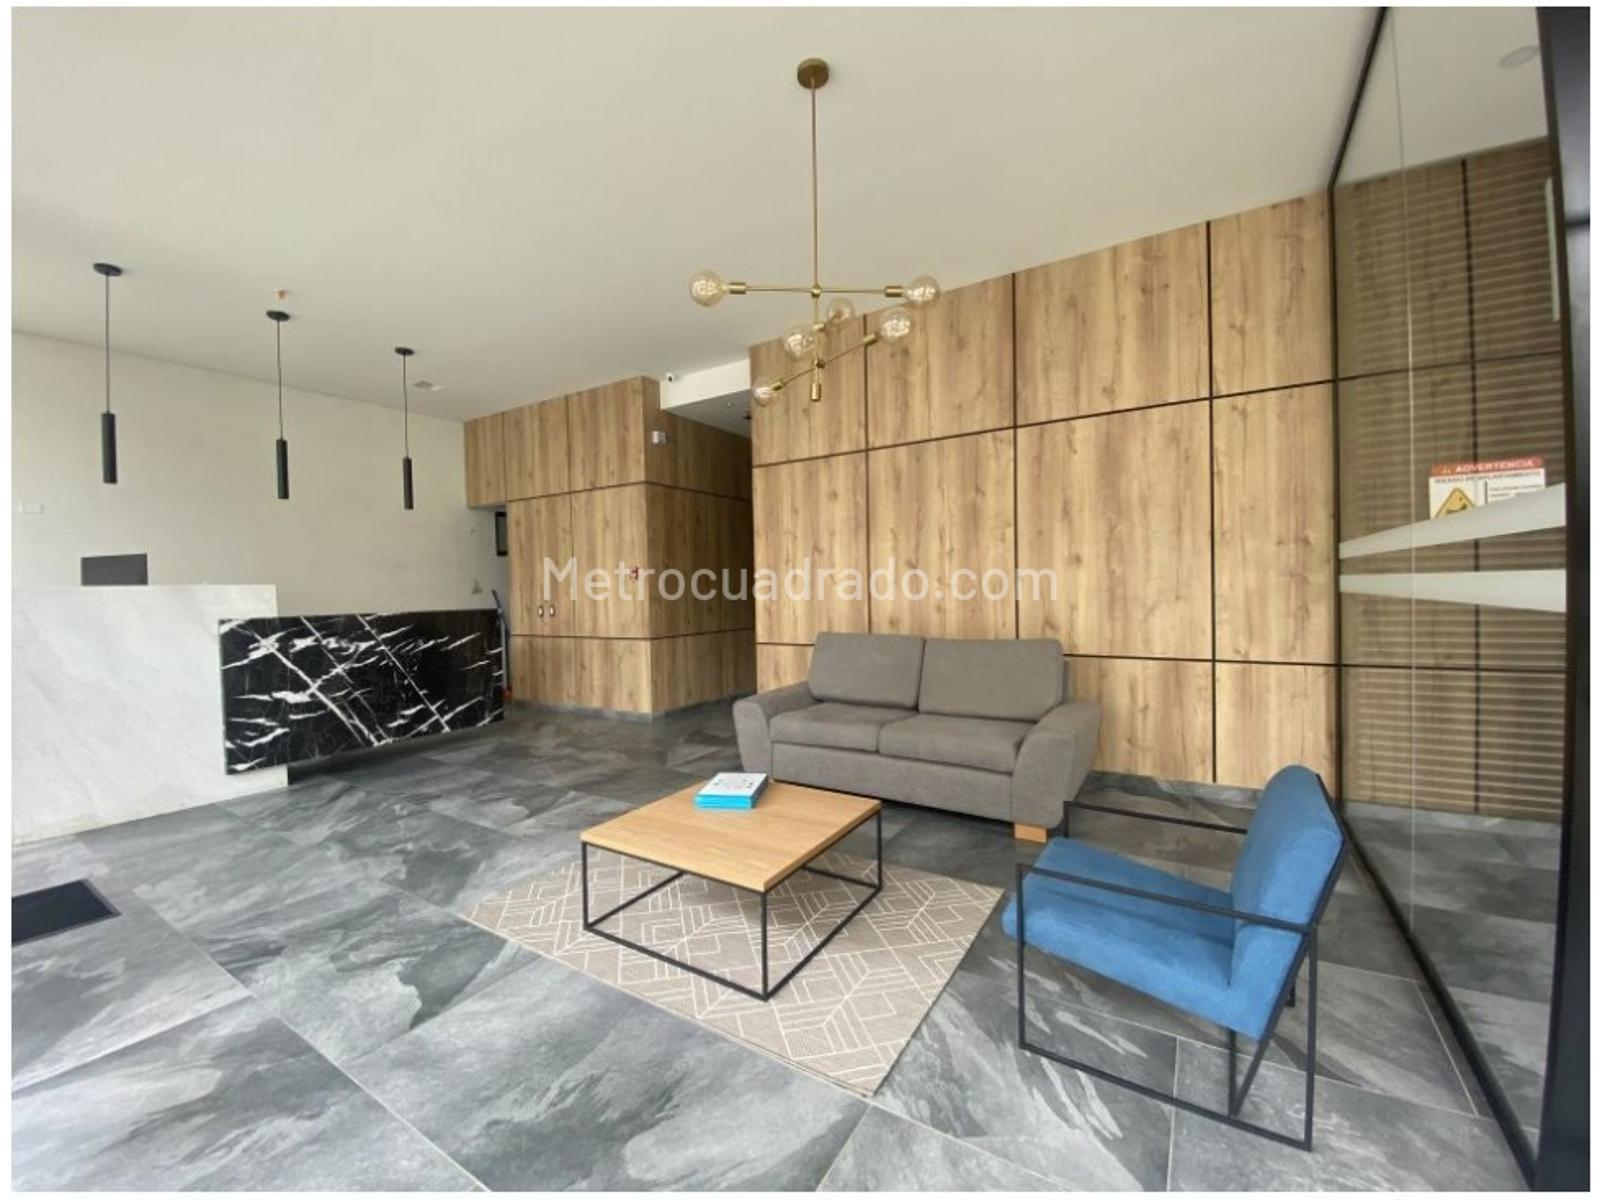

In [37]:
from PIL import Image
from io import BytesIO
import requests

response = requests.get(imagenes.iloc[0]['url'])

img = Image.open(BytesIO(response.content))

img

In [39]:
imagenes.to_csv('../data/processed/metrocuadrado/venta_apartamentos_bogota_imagenes.csv', index=False)   

In [38]:
session_info.show()